In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
# Styling
plt.style.use('ggplot')
plt.rc('figure', figsize=(16, 8))
plt.rc('axes', grid=False)
plt.rc('image', cmap='gray')
plt.rc('font', size=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
np.set_printoptions(edgeitems=2, precision=3, linewidth=85)

<img src="images/scientific-python.png" width="600">

# NumPy Arrays vs Python Lists

| Numpy ndarray | Python list
| --- | ---
| **<span style="color:green">multidimensional</span>** | **<span style="color:red">1-dimensional (although can store nested lists)</span>**
| **<span style="color:green">homogenous</span>**\* | **<span style="color:green">can store python objects of differing types</span>**
| **<span style="color:red">fixed-size</span>** | **<span style="color:green">can be extended or reduced in length</span>**
| **<span style="color:green">faster</span>** | **<span style="color:red">slower</span>**
| **<span style="color:green">consumes less memory</span>** | **<span style="color:red">consumes more memory</span>**

\* You *can* store heterogenous Python objects in a numpy array but you lose the performance and memory benefits.

In [3]:
python_list = [1, 5.5, 'banana']

print(python_list)

print([type(value) for value in python_list])

[1, 5.5, 'banana']
[<class 'int'>, <class 'float'>, <class 'str'>]


In [4]:
import numpy as np

numpy_array = np.array([1, 5.5, 'banana'])

print(numpy_array)

['1' '5.5' 'banana']


In [5]:
print([type(value) for value in numpy_array])

[<class 'numpy.str_'>, <class 'numpy.str_'>, <class 'numpy.str_'>]


In [6]:
numpy_array.dtype

dtype('<U32')

In [7]:
python_list.append('abc')

print(python_list)

[1, 5.5, 'banana', 'abc']


In [8]:
numpy_array.append('abc')

AttributeError: 'numpy.ndarray' object has no attribute 'append'

# Performance

In [9]:
TEN_MILLION = 10_000_000

In [10]:
list_of_numbers = list(range(TEN_MILLION))
list_of_numbers[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
array_of_numbers = np.array(list_of_numbers)
array_of_numbers[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
%timeit doubled = [v * 2 for v in list_of_numbers]

611 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit doubled = array_of_numbers * 2

18 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# Calculate the mean

%timeit sum(list_of_numbers) / len(list_of_numbers)

%timeit np.mean(array_of_numbers)

61.2 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
14.1 ms ± 661 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Memory

In [15]:
from sys import getsizeof
list_size_bytes = getsizeof(list_of_numbers) + sum(getsizeof(v) for v in list_of_numbers)
print('list size (MB):', list_size_bytes / 1e6)

list size (MB): 370.000108


In [16]:
print('numpy array size (MB):', array_of_numbers.nbytes / 1e6)

numpy array size (MB): 80.0


In [17]:
array_of_8_bit_integers = array_of_numbers.astype('uint8')

print('uint8 array size (MB):', array_of_8_bit_integers.nbytes / 1e6)

uint8 array size (MB): 10.0


# Ways to create NumPy arrays

In [18]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype='float16')

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float16)

| `dtype` | data | min | max | resolution (%)
| --- | --- | --- | --- | ---
| `uint8` | unsigned integers | 0 | 255 | 0
| `int8` | signed integers | -128 | 127 | 0
| `int64` | signed integers | -9223372036854775808 | 9223372036854775807 | 0
| `float16` | floating point numbers | -65504.0 | 65504.0 | 0.1
| `float128` | floating point numbers | -1.18973149536e+4932 | 1.18973149536e+4932 | 1e-16
| `U40` | text (utf-8) | &nbsp; | 40 characters ||
| `complex256` | complex numbers | &nbsp; | &nbsp; | &nbsp; |

Complete list: https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html

In [19]:
np.arange(start=5, stop=6, step=.1)

array([5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9])

In [20]:
np.linspace(start=5, stop=10, num=30)

array([ 5.   ,  5.172,  5.345,  5.517,  5.69 ,  5.862,  6.034,  6.207,  6.379,
        6.552,  6.724,  6.897,  7.069,  7.241,  7.414,  7.586,  7.759,  7.931,
        8.103,  8.276,  8.448,  8.621,  8.793,  8.966,  9.138,  9.31 ,  9.483,
        9.655,  9.828, 10.   ])

In [21]:
np.logspace(-2, 2, num=5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [22]:
np.zeros(shape=(3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [23]:
np.ones(shape=(3, 5), dtype='int64')

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [24]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [25]:
np.random.normal(size=(3, 3))

array([[ 0.577,  1.06 ,  1.673],
       [ 0.42 , -0.342, -0.228],
       [ 1.055, -1.08 ,  1.037]])

# Loading a image file

In [26]:
import imageio

parrot = np.asarray(imageio.imread('images/parrot.jpg'))

type(parrot)

numpy.ndarray

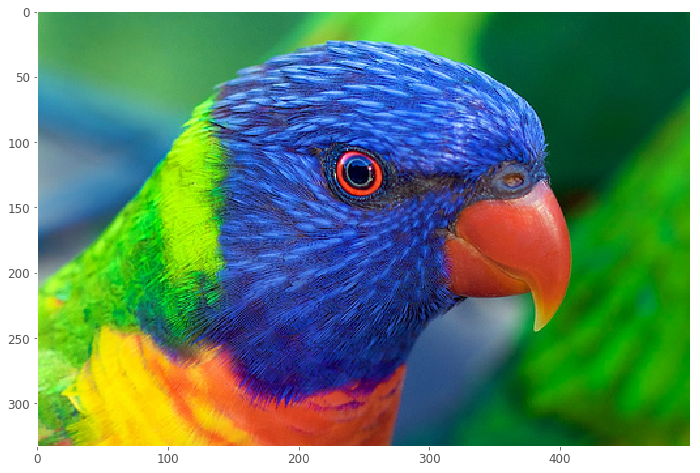

In [27]:
plt.imshow(parrot)

In [28]:
parrot

array([[[ 92, 179,  98],
        [ 89, 176,  95],
        ...,
        [  2,  99,  48],
        [  1, 100,  46]],

       [[ 90, 177,  96],
        [ 88, 175,  94],
        ...,
        [  1,  95,  45],
        [  0,  97,  44]],

       ...,

       [[ 82, 148,  38],
        [ 81, 145,  35],
        ...,
        [ 76, 131,   1],
        [ 78, 131,   0]],

       [[ 83, 146,  41],
        [ 75, 138,  34],
        ...,
        [ 74, 131,   0],
        [ 75, 131,   0]]], dtype=uint8)

In [29]:
print('Dimensions:', parrot.ndim)
print('Shape:', parrot.shape)
print('Data Type:', parrot.dtype)

Dimensions: 3
Shape: (333, 500, 3)
Data Type: uint8


<img src="images/3d_array.png" width="417">

# Refresher on List Indexing and Slicing

In [30]:
characters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
              'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

### Zero based

In [31]:
characters[0]

'A'

### Use negative numbers to index from end of list

In [32]:
characters[-1]

'Z'

### Slice notation: `list[ start : stop : step ]`

Upper bound (`stop`) not included

In [33]:
characters[10:12]

['K', 'L']

In [34]:
characters[::2]

['A', 'C', 'E', 'G', 'I', 'K', 'M', 'O', 'Q', 'S', 'U', 'W', 'Y']

Negative `step` value slices backwards:

In [35]:
characters[25:20:-1]

['Z', 'Y', 'X', 'W', 'V']

# NumPy Array Indexing and Slicing

## One index or slice per dimension

In [36]:
parrot.shape

(333, 500, 3)

In [37]:
parrot[2, 4, 0]

83

<img src="images/indexing.png" width="333">

<img src="images/slicing.png" width="1000">

<img src="images/slicing_combined.png" width="341">

In [38]:
red_array = parrot[:, :, 0]

green_array = parrot[:, :, 1]

blue_array = parrot[:, :, 2]

print('Dimensions:', red_array.ndim)
print('Shape:', red_array.shape)

Dimensions: 2
Shape: (333, 500)


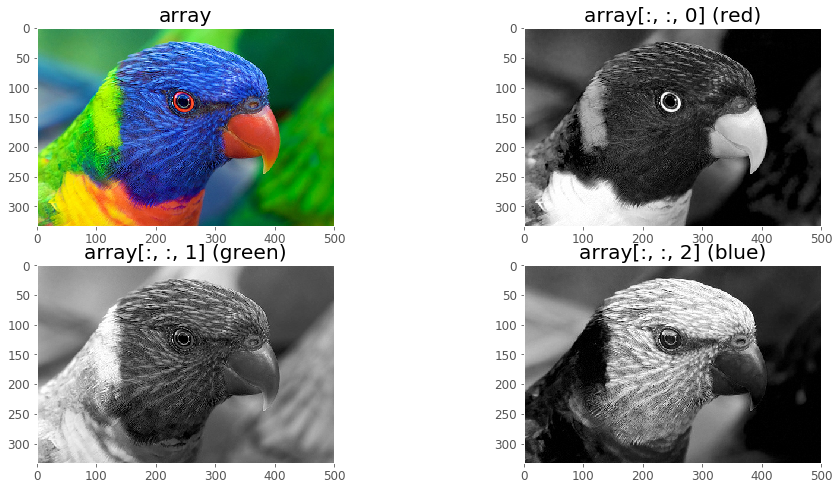

In [39]:
def show_image(arr, title, ax):
    ax.imshow(arr)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2)
show_image(parrot, 'array', axes[0, 0])
show_image(red_array, 'array[:, :, 0] (red)', axes[0, 1])
show_image(green_array, 'array[:, :, 1] (green)', axes[1, 0])
show_image(blue_array, 'array[:, :, 2] (blue)', axes[1, 1])

In [40]:
zoomed = parrot[80:170, 100:400, :]

print('Shape:', zoomed.shape)

Shape: (90, 300, 3)


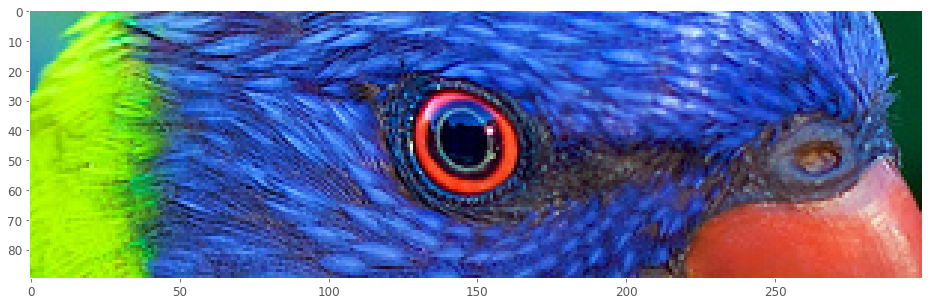

In [41]:
plt.imshow(zoomed)

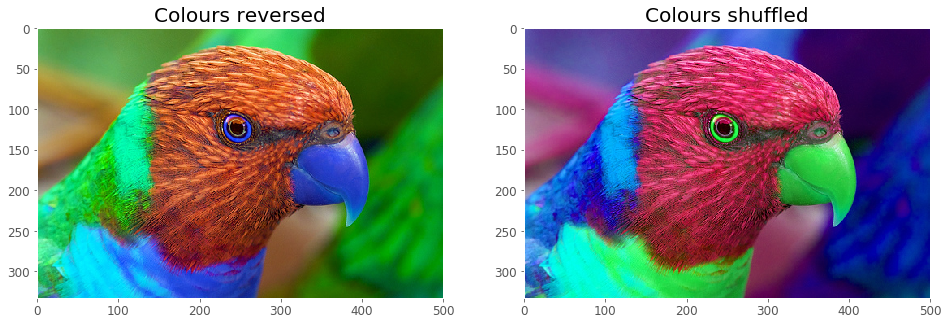

In [42]:
colours_reversed = parrot[:, :, ::-1]

colours_shuffled = parrot[:, :, (2, 0, 1)]

_, axes = plt.subplots(1, 2)
show_image(colours_reversed, 'Colours reversed', axes[0])
show_image(colours_shuffled, 'Colours shuffled', axes[1])

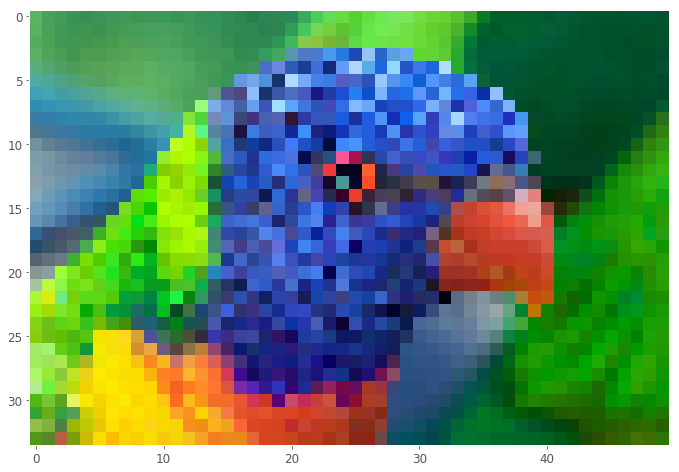

In [43]:
downsampled = parrot[::10, ::10, :]

plt.imshow(downsampled, interpolation='none')

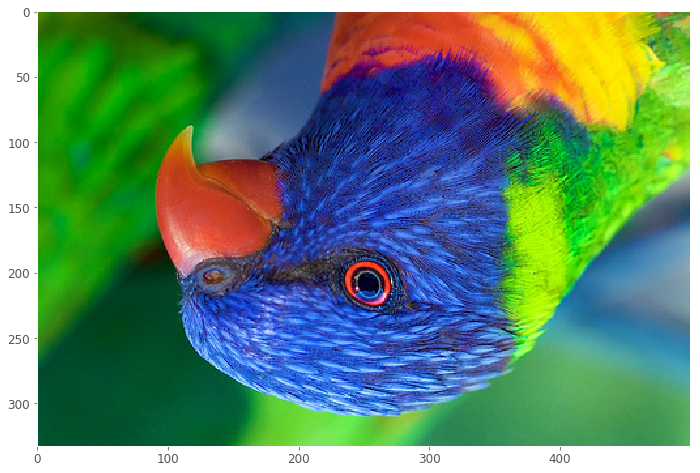

In [44]:
flipped = parrot[::-1, ::-1, :]

plt.imshow(flipped)

# NumPy Array Views

Whenever you take a slice of a numpy array it is actually a "view" of the original array. This saves memory but be warned if you update the slice you will update the original:

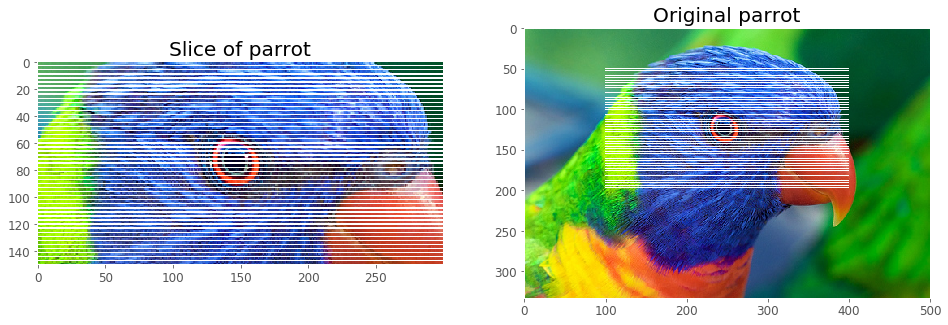

In [45]:
slice_of_parrot = parrot[50:200, 100:400, :]

slice_of_parrot[::3, :, :] = 255

_, axes = plt.subplots(1, 2)
show_image(slice_of_parrot, 'Slice of parrot', axes[0])
show_image(parrot, 'Original parrot', axes[1])

## Use `.copy()` to create a copy of the array that you can safely modify

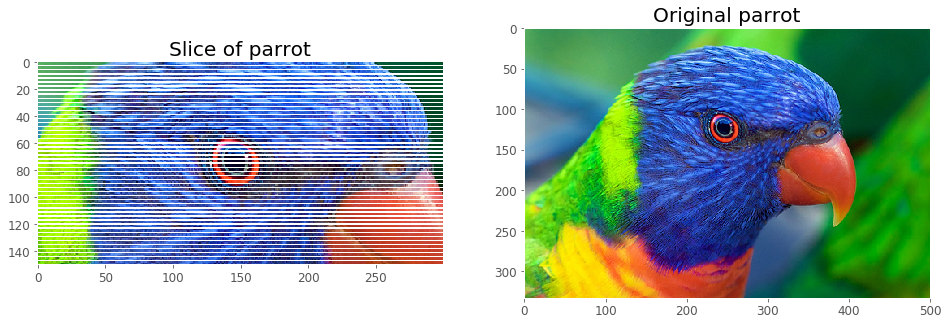

In [46]:
parrot = np.asarray(imageio.imread('images/parrot.jpg'))

slice_of_parrot = parrot[50:200, 100:400, :].copy()
slice_of_parrot[::3, :, :] = 255

_, axes = plt.subplots(1, 2)
show_image(slice_of_parrot, 'Slice of parrot', axes[0])
show_image(parrot, 'Original parrot', axes[1])

# Operations on Arrays

## Statistics

In [47]:
print('Mean:', np.mean(parrot))
print('Median:', np.median(parrot))
print('Standard deviation:', np.std(parrot))
print('Min:', parrot.min())
print('Max:', parrot.max())

Mean: 91.71197597597597
Median: 79.0
Standard deviation: 68.74242470318819
Min: 0
Max: 255


# `axis` parameter

Apply operation along a given dimension.

In [48]:
average_colour = np.mean(parrot, axis=2)

print(average_colour.shape)
print(average_colour.dtype)

(333, 500)
float64


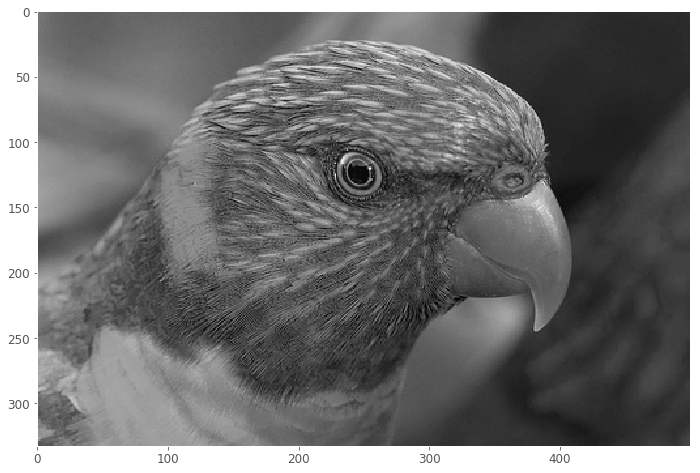

In [49]:
plt.imshow(average_colour)

## Peak finding with `.argmin()` and `.argmax()`

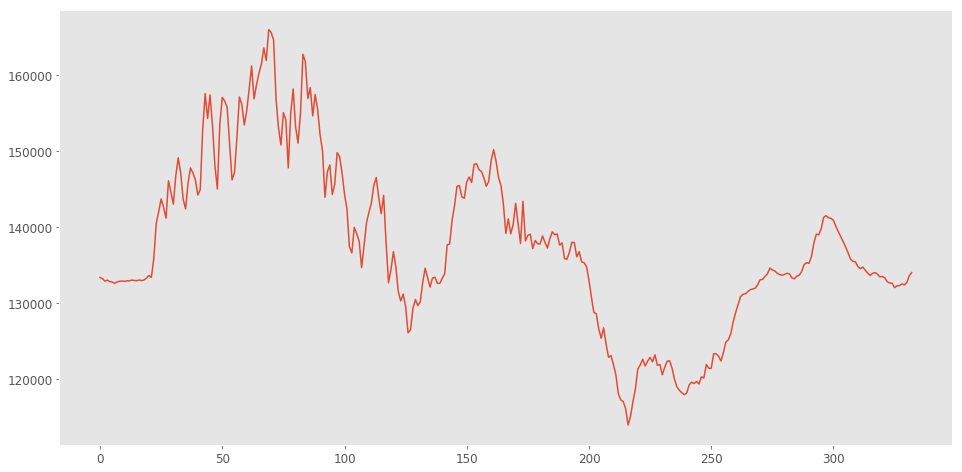

In [50]:
intensity_by_row = parrot.sum(axis=(1, 2))

plt.plot(intensity_by_row)

In [51]:
brightest_row = intensity_by_row.argmax()
darkest_row = intensity_by_row.argmin()

print('Brightest row index:', brightest_row)
print('Darkest row index:', darkest_row)

Brightest row index: 69
Darkest row index: 216


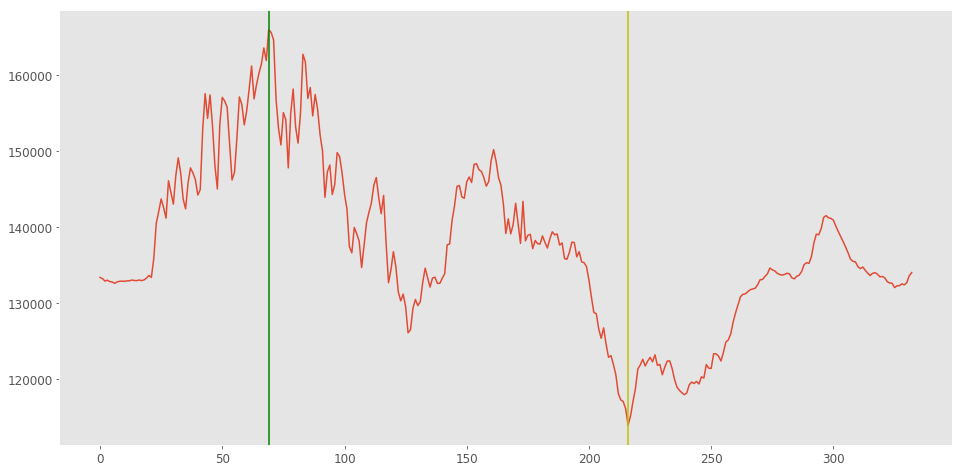

In [52]:
plt.plot(intensity_by_row)
plt.axvline(brightest_row, color='g')
plt.axvline(darkest_row, color='y')

## Use `.reshape()` to change the lengths of the dimensions (number of elements remains constant)

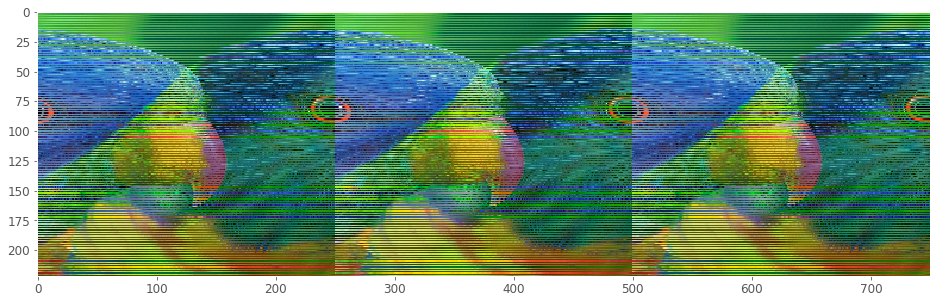

In [53]:
reshaped = np.reshape(parrot, (222, -1, 3))

plt.imshow(reshaped)

## Use `.astype` to convert to a different data type

In [54]:
parrot.astype('float64')

array([[[ 92., 179.,  98.],
        [ 89., 176.,  95.],
        ...,
        [  2.,  99.,  48.],
        [  1., 100.,  46.]],

       [[ 90., 177.,  96.],
        [ 88., 175.,  94.],
        ...,
        [  1.,  95.,  45.],
        [  0.,  97.,  44.]],

       ...,

       [[ 82., 148.,  38.],
        [ 81., 145.,  35.],
        ...,
        [ 76., 131.,   1.],
        [ 78., 131.,   0.]],

       [[ 83., 146.,  41.],
        [ 75., 138.,  34.],
        ...,
        [ 74., 131.,   0.],
        [ 75., 131.,   0.]]])

In [55]:
small_array = np.array([0, 1, 2], dtype='uint8')

small_array - 1

array([255,   0,   1], dtype=uint8)

In [56]:
small_array.astype('int') - 1

array([-1,  0,  1])

## Convert to a Python list

In [57]:
parrot_list = parrot.tolist()

## Many other functions including...

* `np.log`, `np.sqrt`, `np.abs`, `np.real`, `np.imag`
* `np.sin`, `np.cos`, `np.tan`, `np.arcsin`, ...
* `np.linalg.det`, `np.linalg.inv`, `np.linalg.svd`, ...
* `np.fft`

Even more available in the **scipy** package.

# Broadcasting

When an arithmetic operation is done on two arrays with different shapes, numpy will expand dimensions of length one to try and make the shapes match in a process called [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

<img src="images/broadcasting.png" width="861">

If the number of dimensions don't match, imagine the array with fewer dimensions being left padded with dimensions of length 1.

### Using broadcasting to apply colour transformation

In [58]:
parrot.shape

# Supported broadcasting shapes:
#           (1)
#           (3)
#        (1, 3)
#      (500, 3)
#   (1,   1, 3)
#   (1, 500, 3)
# (333,   1, 3)
# (333, 500, 3)

(333, 500, 3)

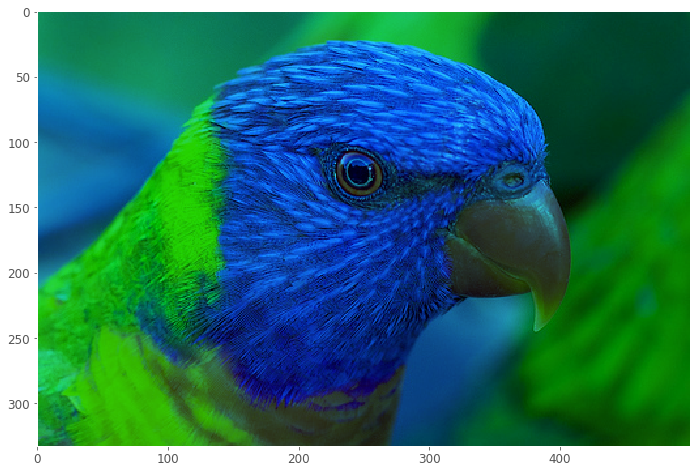

In [59]:
enhanced_parrot = parrot * [.25, 1.0, 1.2]

# Broadcasting check: (333, 500, 3) * (3) ⇒ (333, 500, 3) * (1, 1, 3) : ✓

normalised = enhanced_parrot / enhanced_parrot.max()

plt.imshow(normalised)

# Matrix Algebra

## Luminance-Preserving Transform

$$
\begin{align*}
Y &= R \times 0.299 + G \times 0.587 + B \times 0.114 \\
Y &= \left[\begin{array}{3} R & G & B \end{array} \right] \cdot \left[\begin{array}{1} 0.299\\ 0.587\\ 0.114 \end{array}\right] \\
\end{align*}
$$

In [60]:
grayscale_parrot = parrot @ [0.299, 0.587, 0.114]

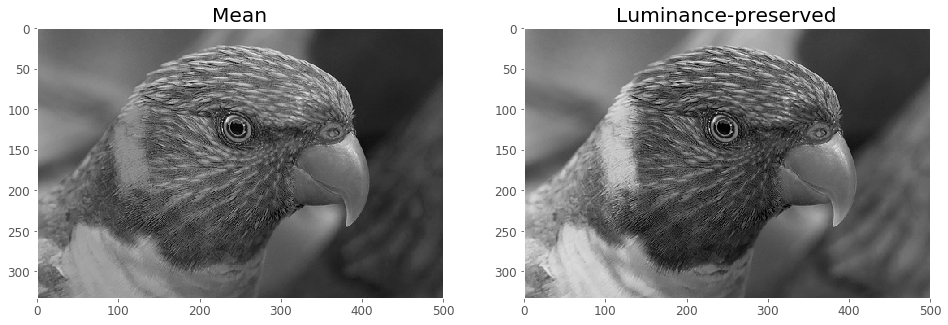

In [61]:
_, axes = plt.subplots(1, 2)
show_image(average_colour, 'Mean', axes[0])
show_image(grayscale_parrot, 'Luminance-preserved', axes[1])

## Transpose

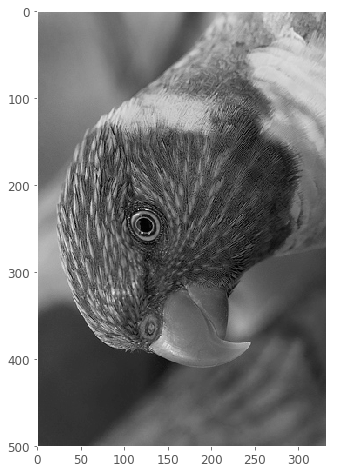

In [62]:
transposed_parrot = grayscale_parrot.T

plt.imshow(transposed_parrot)

# Setting array values with a boolean mask

In [63]:
mask = grayscale_parrot > grayscale_parrot.mean()

In [64]:
print(mask)
print(mask.shape)

[[ True  True ... False False]
 [ True  True ... False False]
 ...
 [ True  True ... False  True]
 [ True  True ... False False]]
(333, 500)


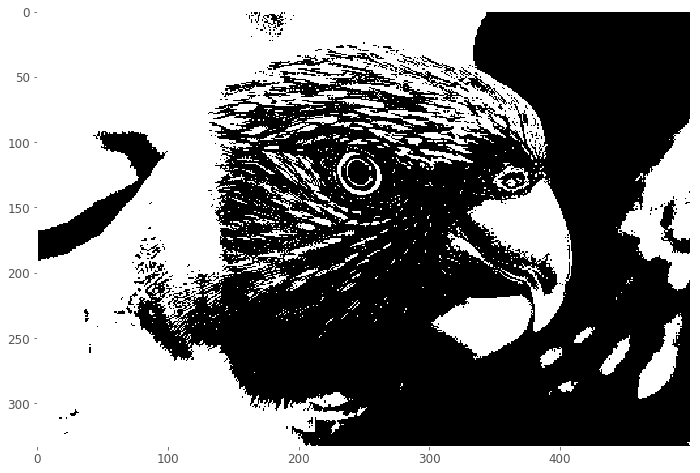

In [65]:
black_and_white_parrot = np.zeros_like(grayscale_parrot)
black_and_white_parrot[mask] = 255

plt.imshow(black_and_white_parrot)

# Reading and writing

## Save a single array

In [66]:
np.save('output/data.npy', parrot)

In [67]:
arr = np.load('output/data.npy')

print(arr.shape, arr.dtype)

(333, 500, 3) uint8


## Save multiple arrays

In [68]:
np.savez('output/data.npz', parrot=parrot, other=grayscale_parrot)

In [69]:
parrot_reloaded = np.load('output/data.npz')['parrot']

print(parrot_reloaded.shape, parrot_reloaded.dtype)

(333, 500, 3) uint8


## Save raw bytes

### Warning: shape and dtype information is not stored

In [70]:
parrot.tofile('output/data.raw')

parrot_reloaded = np.fromfile('output/data.raw')

print(parrot_reloaded.shape, parrot_reloaded.dtype)

(62437,) float64


## HDF5

In [71]:
import h5py

with h5py.File('output/data.hdf5', 'w') as file:
    file['parrot'] = parrot

In [72]:
with h5py.File('output/data.hdf5') as file:
    parrot_reloaded = file['parrot'][...]

print(parrot_reloaded.shape, parrot_reloaded.dtype)

(333, 500, 3) uint8


## MATLAB

In [73]:
import scipy.io

scipy.io.savemat('output/data.mat', {'parrot': parrot})

In [74]:
parrot_reloaded = scipy.io.loadmat('output/data.mat')['parrot']

print(parrot_reloaded.shape, parrot_reloaded.dtype)

(333, 500, 3) uint8


# Bonus: Conway's Game of Life in Two Lines of NumPy

In [75]:
def life_step(X):
    """From the brilliant Jake VanderPlas: https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/"""
    neighbours = sum(np.roll(np.roll(X, i, 0), j, 1) for i in (-1, 0, 1) for j in (-1, 0, 1) if (i != 0 or j != 0))
    return (neighbours == 3) | (X & (neighbours == 2))

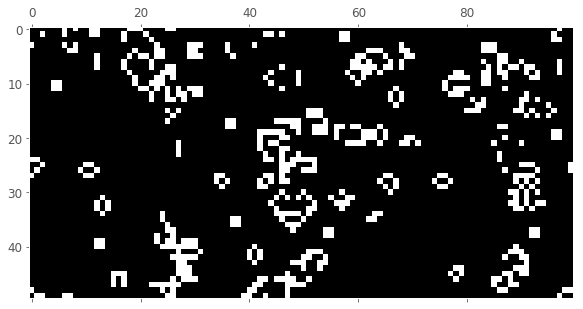

In [76]:
X = np.random.randint(2, size=(50, 100), dtype='uint8')

fig, ax = plt.subplots(figsize=(10, 5))
img = ax.matshow(X)

try:
    while True:
        X = life_step(X)
        img.set_data(X)
        clear_output(wait=True)
        display(fig)
except KeyboardInterrupt:
    pass